| Name | Surname | ID Number |
|------|---------|---------------------|
| Lorenzo | Calandra Buonaura | 2107761 |

In [5]:
library("dplyr", warn.conflicts = FALSE)
library("ggplot2", warn.conflicts = FALSE)
library("geosphere", warn.conflicts = FALSE)
library("spatstat", warn.conflicts = FALSE)
library("gridExtra", warn.conflicts = FALSE)

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-9


Attaching package: ‘spatstat.geom’


The following object is masked from ‘package:geosphere’:

    perimeter


Loading required package: spatstat.random

spatstat.random 3.2-3

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-7

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-11

Loading required package: spatstat.linnet

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatstat, type ‘beginner’ 




# Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n = 75$ patients known to have the disease is screened using the new method.

(a) what is the probability distribution of y, the number of times the new method fails to detect the disease?

(b) on the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is the frequentist estimator of the failure probability of the new method?

In [2]:
n <- 75
y <- 6

frequentist_estimator <- y / n

cat("Frequentist estimator of the failure probability:", frequentist_estimator)

Frequentist estimator of the failure probability: 0.08

(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance.

For the beta distribution we have:

$
\begin{cases}
\mu = \frac{\alpha}{\alpha + \beta} \\
\sigma = \frac{\alpha\beta}{(\alpha + \beta)^2 + (\alpha + \beta + 1)} 
\end{cases}
$

Inverting these formula we obtain: 

$
\begin{cases}
\alpha = \mu \left(\frac{\mu (1 - \mu)}{\sigma ^ 2} - 1\right) \\
\beta = \alpha \left( \frac{1}{\mu} - 1\right)
\end{cases}
$

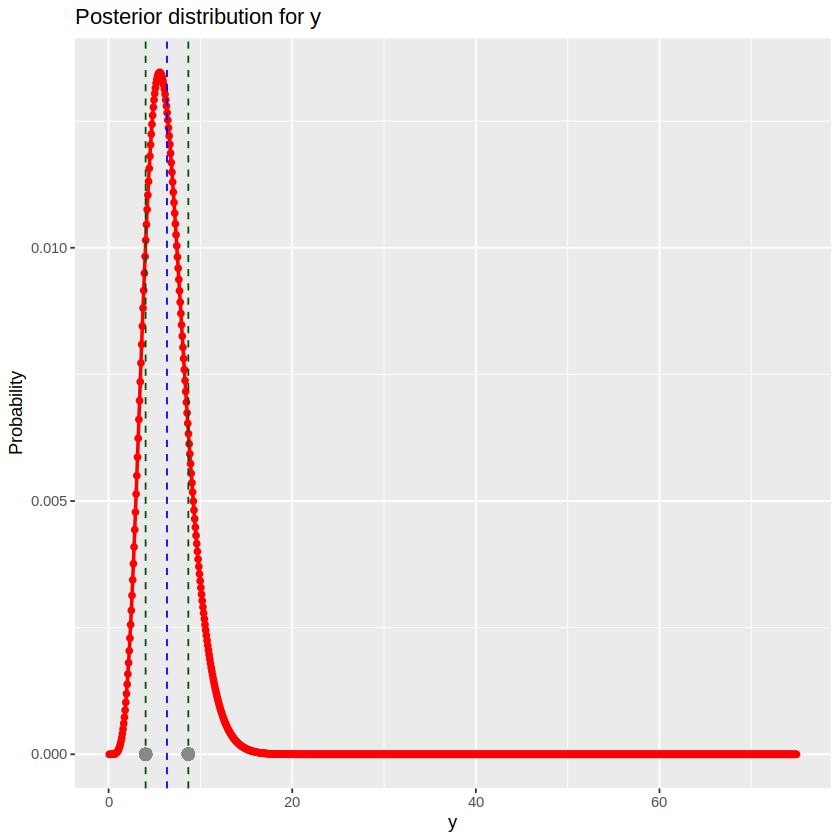

In [65]:
post_beta <- function(r, n, params, p) {
  beta <- dbeta(p, params[1], params[2])
  normalization <- sum(beta * dbinom(r, n, p))

  return(beta * dbinom(r, n, p) / normalization)
}

mu <- 0.15
sigma <- 0.14

alpha <- mu * (((mu * (1 - mu)) / sigma**2) - 1)
beta <- alpha * ((1 / mu) - 1)

p <- seq(0.001, 1 - 0.001, 0.001)

post_beta_values <- post_beta(y, n, c(alpha, beta), p)
mean_beta_value <- weighted.mean(p, post_beta_values) * n
std_beta_value <- sqrt(weighted.var(p, post_beta_values)) * n

std_limits = c(mean_beta_value - std_beta_value, mean_beta_value + std_beta_value)

std_beta_prob_lower <- post_beta_values[std_limits[1]]
std_beta_prob_upper <- post_beta_values[std_limits[2]]

ggplot(data = data.frame(p * n, post_beta_values),
       aes(x = p * n, y = post_beta_values)) +
  geom_point(color = "red", size = 1.5) +
  geom_line(color = "red", linewidth = 1) +
  geom_vline(xintercept = mean_beta_value, linetype = "dashed", color = "blue") +
  geom_vline(xintercept = mean_beta_value - std_beta_value, linetype = "dashed", color = "#035003") +
  geom_vline(xintercept = mean_beta_value + std_beta_value, linetype = "dashed", color = "#035003") +
  geom_point(x = std_limits[1], y = std_beta_prob_lower, color = "#888888", size = 3) +
  geom_point(x = std_limits[2], y = std_beta_prob_upper, color = "#888888", size = 3) +
  labs(title = "Posterior distribution for y",
       x = "y",
       y = "Probability")

(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

(e) Perform the same hypothesis test in the classical frequentist way.